<a href="https://colab.research.google.com/github/qTronor/BigData_lessons/blob/main/BigData_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import seaborn as sns
import random

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AI_Datasets/BigData_3/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# С помощью метода describe() посмотреть статистику по данным.

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


На основе приведенных данных мы видим средние, минимальные и максимальные значения, стандартное отклонение значений и границы каждого квартиля возраста, индекса массы тела, количества детей и расходов

# Построить гистограммы для числовых показателей.

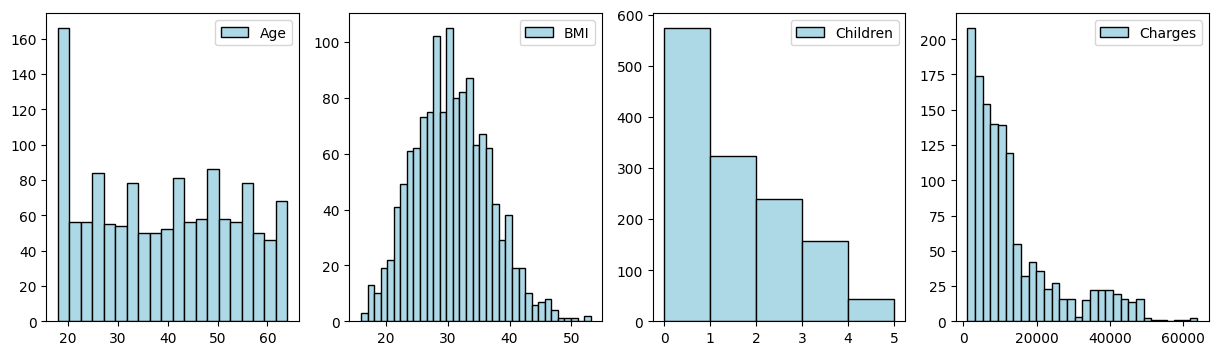

In [ ]:
fig, ax = plt.subplots(1, 4, figsize = (15, 4))
ax[0].hist(df['age'], edgecolor = "black", color = "lightBlue", bins = 20, label = "Age")
ax[0].legend()

ax[1].hist(df['bmi'], edgecolor = "black", color = "lightBlue", bins = 35, label = "BMI")
ax[1].legend()

ax[2].hist(df['children'], edgecolor = "black", color = "lightBlue", bins = 5, label = "Children")
ax[2].legend()

ax[3].hist(df['charges'], edgecolor = "black", color = "lightBlue", bins = 30, label = "Charges")
ax[3].legend()

На основе приведенных данных видно, что больше всего данных о людях с возрастом до 20 лет, индекс массы тела возрастает к 30 годам, а больше всего записей с количеством детей = 1, выплаты же постепенно уменьшаются и уже меньше половины находятся выше суммы в 20000. По гистограммам возраста и ииндекса массы тела можно предсказать группу которая чаще обращается в страховые службы за выплатами.

#Найти меры центральной тенденции и меры разброса для индекса массы тела (bmi) и расходов (charges). Отобразить результаты в виде текста и на гистограммах (3 вертикальные линии). Добавить легенду на графики.

In [ ]:
print("Mean charges: = %f"%np.mean(df["charges"]))
print("Mode charges: ", sts.mode(df["charges"]))
print("Median charges: = %f "%np.median(df["charges"]))

print("Mean bmi: = %f"%np.mean(df["bmi"]))
print("Mode bmi: ", sts.mode(df["bmi"]))
print("Median bmi: = %f"%np.median(df["bmi"]))

Mean charges: = 13270.422265
Mode charges:  ModeResult(mode=1639.5631, count=2)
Median charges: = 9382.033000 
Mean bmi: = 30.663397
Mode bmi:  ModeResult(mode=32.3, count=13)
Median bmi: = 30.400000


In [ ]:
std = df['bmi'].std()
raz = df['bmi'].max() - df['bmi'].min()
q1 = np.percentile(df['bmi'], 25, interpolation = 'midpoint')
q3 = np.percentile(df['bmi'], 75, interpolation = 'midpoint')
iqr1 = q3 - q1
iqr2 = sts.iqr(df['bmi'], interpolation = 'midpoint')

print("Стандартное отклонение bmi: ", std)
print("Размах bmi: ", raz)
print("Межквартальынй размах bmi через numpy: ", iqr1)
print("Межквартальынй размах bmi через scipy: ", iqr2)

std = df['charges'].std()
raz = df['charges'].max() - df['charges'].min()
q1 = np.percentile(df['charges'], 25, interpolation = 'midpoint')
q3 = np.percentile(df['charges'], 75, interpolation = 'midpoint')
iqr1 = q3 - q1
iqr2 = sts.iqr(df['charges'], interpolation = 'midpoint')

print("\nСтандартное отклонение charges: ", std)
print("Размах charges: ", raz)
print("Межквартальынй размах charges через numpy: ", iqr1)
print("Межквартальынй размах charges через scipy: ", iqr2, "\n")

Стандартное отклонение bmi:  6.098186911679014
Размах bmi:  37.17
Межквартальынй размах bmi через numpy:  8.384999999999998
Межквартальынй размах bmi через scipy:  8.384999999999998

Стандартное отклонение charges:  12110.011236694001
Размах charges:  62648.554110000005
Межквартальынй размах charges через numpy:  11879.80148
Межквартальынй размах charges через scipy:  11879.80148 



<ipython-input-7-08fc940ea8df>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q1 = np.percentile(df['bmi'], 25, interpolation = 'midpoint')
<ipython-input-7-08fc940ea8df>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q3 = np.percentile(df['bmi'], 75, interpolation = 'midpoint')
<ipython-input-7-08fc940ea8df>:15: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q1 = 

Text(0.5, 1.0, 'Гистограмма для charges')

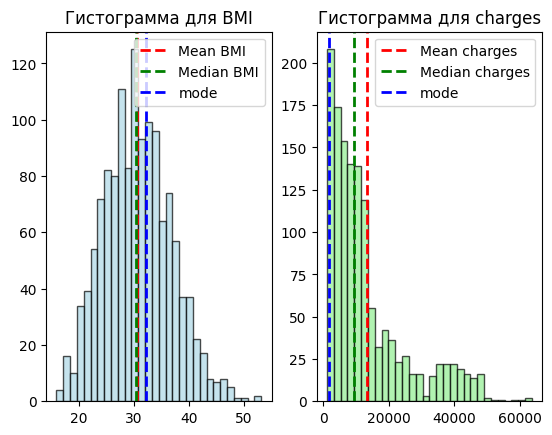

In [ ]:
plt.subplot(1, 2, 1)
plt.hist(df['bmi'], edgecolor = "black", bins=30, color='lightBlue', alpha=0.7)
plt.axvline(np.mean(df["bmi"]), color='red', linestyle='dashed', linewidth=2, label='Mean BMI')
plt.axvline(np.median(df["bmi"]), color='green', linestyle='dashed', linewidth=2, label='Median BMI')
plt.axvline(sts.mode(df["bmi"])[0], color='blue', linestyle='dashed', linewidth=2, label='mode')

plt.legend()
plt.title('Гистограмма для BMI')

plt.subplot(1, 2, 2)
plt.hist(df['charges'], edgecolor = "black", bins=30, color='lightGreen', alpha=0.7)
plt.axvline(np.mean(df["charges"]), color='red', linestyle='dashed', linewidth=2, label='Mean charges')
plt.axvline(np.median(df["charges"]), color='green', linestyle='dashed', linewidth=2, label='Median charges')
plt.axvline(sts.mode(df["charges"])[0], color='blue', linestyle='dashed', linewidth=2, label='mode')

plt.legend()
plt.title('Гистограмма для charges')

Среднее и мидиана bmi почти не отличаются значениями, в то же время в рассходах присутствует значительная разница в среднем и медианном значении

# Построить box-plot для числовых показателей. Названия графиков должны соответствовать названиям признаков.

Text(0.5, 1.0, 'Charges Boxplot')

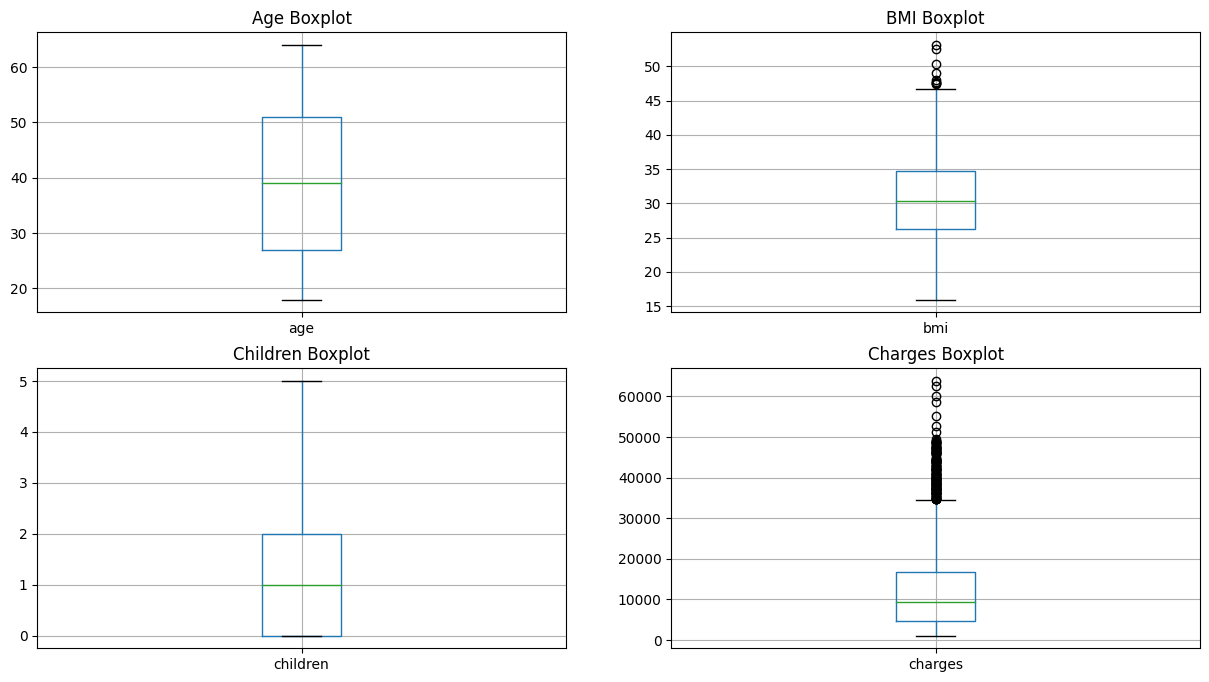

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
df.boxplot(ax=ax[0][0], column='age')
df.boxplot(ax=ax[0][1], column='bmi')
df.boxplot(ax=ax[1][0], column='children')
df.boxplot(ax=ax[1][1], column='charges')


ax[0][0].set_title('Age Boxplot')
ax[0][1].set_title('BMI Boxplot')
ax[1][0].set_title('Children Boxplot')
ax[1][1].set_title('Charges Boxplot')

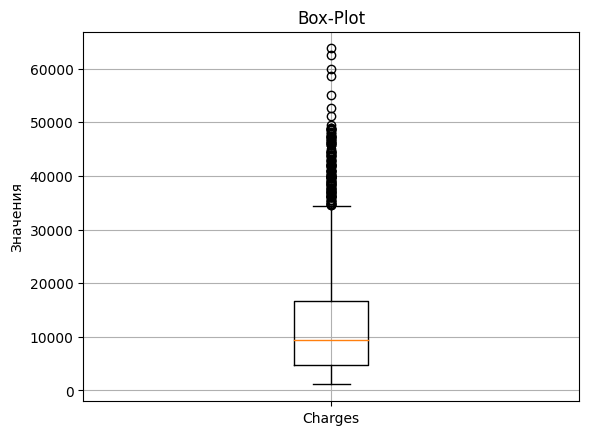

In [ ]:
plt.boxplot([df["charges"]])
plt.title('Box-Plot')
plt.ylabel('Значения')
plt.xticks([1], ['Charges'])
#plt.scatter(df['children'], df['children'], marker='o', label='Точки рассеяния')
plt.grid()
plt.show()

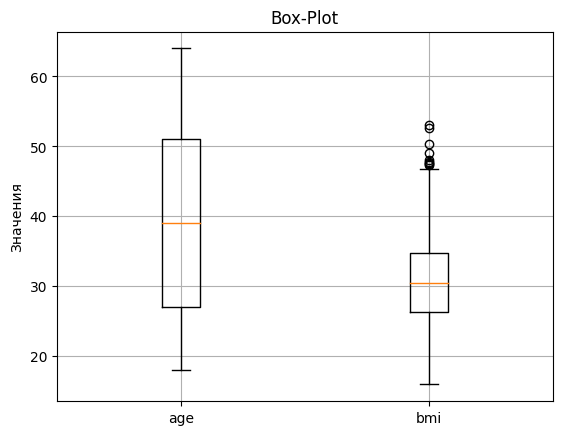

In [ ]:

plt.boxplot([df["age"], df["bmi"]])
plt.title('Box-Plot')
plt.ylabel('Значения')
plt.xticks([1, 2], ['age', 'bmi'])
#plt.scatter(df['children'], df['children'], marker='o', label='Точки рассеяния')
plt.grid()
plt.show()

<Axes: >

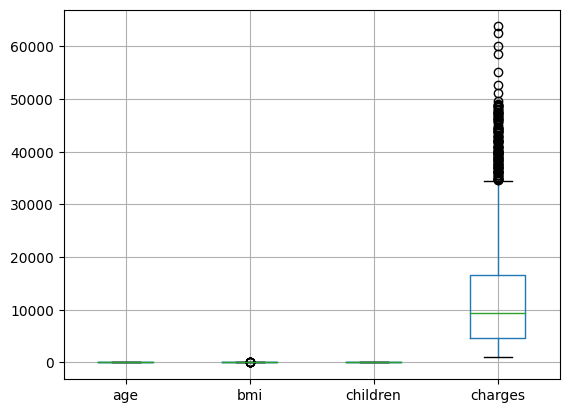

In [ ]:
df.boxplot()

# Используя признак charges или imb, проверить, выполняется ли центральная предельная теорема. Использовать различные длины выборок n. Количество выборок = 300.

In [ ]:
means = []
num_samples = 300
sample_sizes = [10, 30, 50, 100]

In [ ]:
for sample_size in sample_sizes:
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.choice(df['bmi'], size=sample_size, replace=True)
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)
    means.append(sample_means)

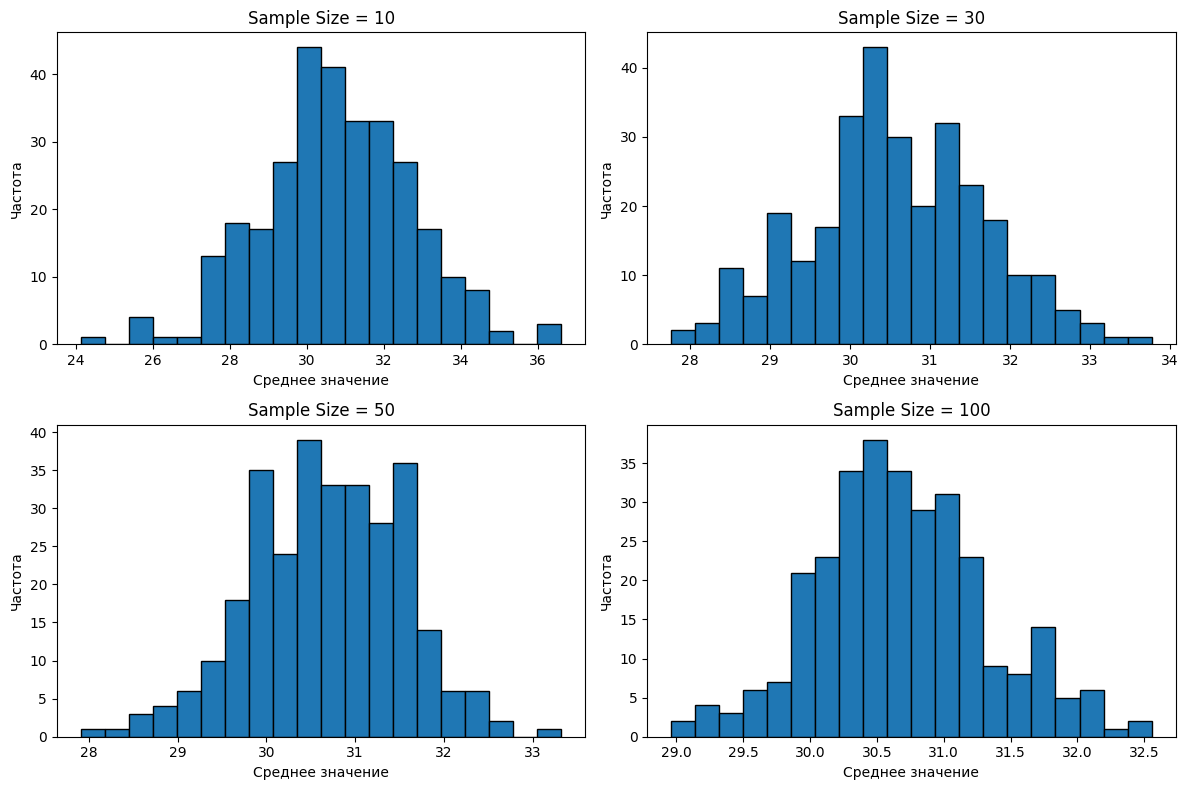

In [ ]:
plt.figure(figsize=(12, 8))
for i, sample_size in enumerate(sample_sizes):
    plt.subplot(2, 2, i+1)
    plt.hist(means[i], bins=20, edgecolor='k')
    plt.title(f'Sample Size = {sample_size}')
    plt.xlabel('Среднее значение')
    plt.ylabel('Частота')
plt.tight_layout()
plt.show()

In [ ]:
for i, sample_size in enumerate(sample_sizes):
    mean = np.mean(means[i])
    std_dev = np.std(means[i])
    print(f'Sample Size = {sample_size}: Среднее = {mean}, Стандартное отклонение = {std_dev}')

Sample Size = 10: Среднее = 30.76222333333333, Стандартное отклонение = 1.9306200109780507
Sample Size = 30: Среднее = 30.565515, Стандартное отклонение = 1.102539214242136
Sample Size = 50: Среднее = 30.676482666666672, Стандартное отклонение = 0.8556945875132992
Sample Size = 100: Среднее = 30.69173016666667, Стандартное отклонение = 0.6394407402944431


In [ ]:
print(df['bmi'].std())
print(df['bmi'].mean())

6.098186911679014
30.66339686098655


C увеличением размера выборки средние значения становятся более нормально распределенными, и стандартное отклонение уменьшается, что соответствует ЦПТ.
Среднее значение все средних очень близко к среднему значению исходной генеральной совокупности.

# Построить 95% и 99% доверительный интервал для среднего значения расходов и среднего значения индекса массы тела.

Среднее Генеральной выборки: 30.66339686098655


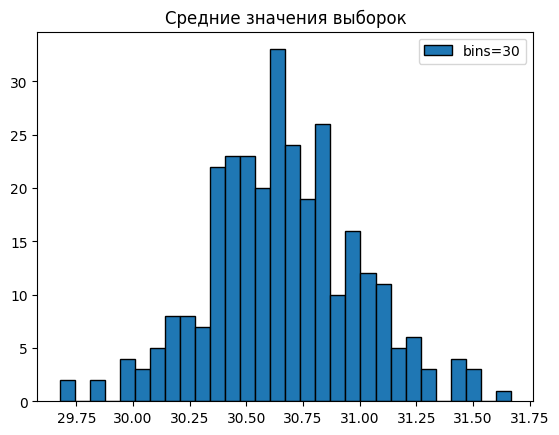

Стандратное отклонение: 0.326944746025857
Среднее среди средних: 30.665304011112383


In [ ]:
random.seed()

print(f'Среднее Генеральной выборки: {np.mean(df["bmi"])}')

sample_mean = [np.mean(df.sample(n=random.randrange(100, 500))['bmi']) for _ in range(300)]
average = np.mean(sample_mean)
average_deviation = (sum((sample_mean[_]-average)**2 for _ in range(300)) / 300)**0.5
#print(sample_mean)
fig, ax = plt.subplots()
ax.hist(sample_mean, bins=30, edgecolor='black', label='bins=30');
ax.set_title('Средние значения выборок')
ax.legend()
plt.show()
print(f'Стандратное отклонение: {average_deviation}')
print(f'Среднее среди средних: {average}')

95% доверительный интервал: [30.024492308901703 , 31.306115713323063]
99% доверительный интервал: [29.82178656636567 , 31.508821455859096]


([<matplotlib.axis.YTick at 0x7cfdf98d73d0>,
 [Text(0, 0, ''),
  Text(0, 1, '95 percent'),
  Text(0, 2, '99 percent'),
  Text(0, 3, '')])

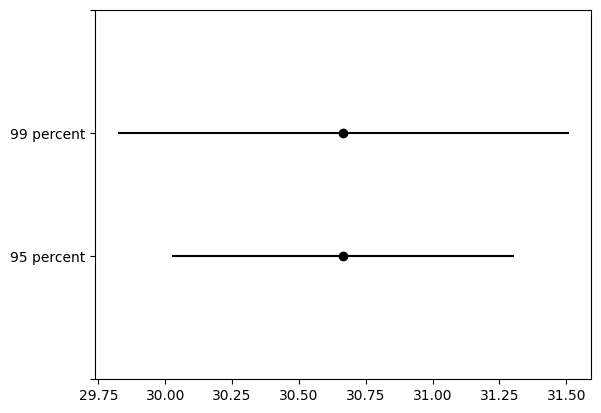

In [ ]:
print(f"95% доверительный интервал: [{average - 1.96*average_deviation} , {average + 1.96*average_deviation}]")
print(f"99% доверительный интервал: [{average - 2.58*average_deviation} , {average + 2.58*average_deviation}]")

x = [average, average]
y = [1, 2]
errors = [1.96*average_deviation, 2.58*average_deviation]

plt.figure()
plt.errorbar(x, y, xerr=errors, fmt = 'o', color = 'k')
plt.yticks((0, 1, 2, 3), ('', '95 percent', '99 percent',''))

In [ ]:
means = []
confidence_interval_plus = []
confidence_interval_minus = []
num_samples = 300
params = ['bmi', 'charges']
percents = [1.96, 2.58]
sample_sizes = [10, 30, 50, 100] #Различные длины выборок

In [ ]:
for parameter in params:
  for percent in percents:
    for sample_size in sample_sizes:
      sample_means = []
      for _ in range(num_samples):
          sample = np.random.choice(df[parameter], size=sample_size, replace=True) # Выборка из генеральной
          sample_mean = np.mean(sample) # Среднее из выборки
          sample_means.append(sample_mean)
          confidence_interval_plus.append(sample_mean - (percent * (sample.std()/np.sqrt(len(sample))))) # Доверительный интервал с +
          confidence_interval_minus.append(sample_mean + (percent * (sample.std()/np.sqrt(len(sample))))) # Доверительный интервал с -
      means.append(sample_means)

95 % построенных доверительных интервалов содержат истинное
значение среднего генеральной совокупности. Далее сделал то же самое, но с генеральной выборкой

In [ ]:
for parameter in params:
  for percent in percents:
    print(parameter,':', df[parameter].mean() - (percent * (df[parameter].std()/np.sqrt(len(df[parameter])))),
    df[parameter].mean() + (percent * (df[parameter].std()/np.sqrt(len(df[parameter])))))

bmi : 30.336636967245095 30.990156754728
bmi : 30.233274143714635 31.093519578258462
charges : 12621.530054682518 13919.314475599995
charges : 12416.268233006796 14124.576297275717


In [ ]:
print("bmi mean :", df['bmi'].mean())
print("charges mean:", df['charges'].mean())

bmi mean : 30.66339686098655
charges mean: 13270.422265141257


# Проверить распределения следующих признаков на нормальность: индекс массы тела, расходы. Сформулировать нулевую и альтернативную гипотезы. Для каждого признака использовать KS-тест и q-q plot. Сделать выводы на основе полученных p-значений


*   Нулевая гипотеза для bmi: ИМТ имеет нормальное распределение.

*  Альтернативная гипотеза для Нулевая гипотеза для bmi: ИМТ не имеет нормальное распределение.


*   Нулевая гипотеза для charges: Расходы имеют нормальное распределение.
*   Альтернативная гипотеза для charges: Расходы не имеют нормальное распределение.







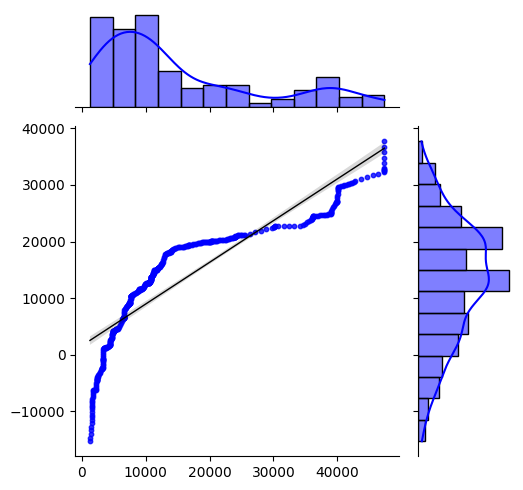

In [ ]:
#Q-Q Plot
import statsmodels.api as sm
norm = np.random.normal(13270, 12110, 100)
df = np.random.choice(df['charges'], 100)

ls = np.linspace(0, 100, 500)
norm_n = np.percentile(norm, ls)
df_n = np.percentile(df, ls)

j = sns.jointplot(x=df_n, y=norm_n,
kind='reg', truncate=True,
color="b", height=5, ratio=3,
scatter_kws={"s":10}, line_kws={"lw":1, 'color':'black'})

# j.ax_marg_y.set_ylim(0, 50000)
# #j.ax_marg_x.set_xlim(0, 50000)

Первый график показывает, что середина распределения исследуемой выборки  
следует нормальному закону, но его концы отклоняются от него.

 На втором графике распределение исследуемой выборки сильно
отличается от нормального.

В первом случае нулевая гипотеза не отвергаяется и выборка имеет нормальное распределение.

Во втором случае p-значение намного меньше 0.05, следовательно нулевая гипотеза
отвергается и выборка не имеет нормального распределения.



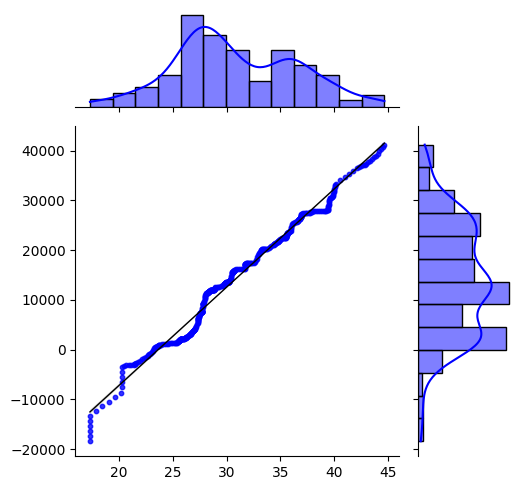

In [ ]:
norm = np.random.normal(13270, 12110, 100)
df = np.random.choice(df['bmi'], 100)

ls = np.linspace(0, 100, 500)
norm_n = np.percentile(norm, ls)
df_n = np.percentile(df, ls)

j = sns.jointplot(x=df_n, y=norm_n,
kind='reg', truncate=True,
color="b", height=5, ratio=3,
scatter_kws={"s":10}, line_kws={"lw":1, 'color':'black'})


/usr/local/lib/python3.10/dist-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib/python3.10/dist-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


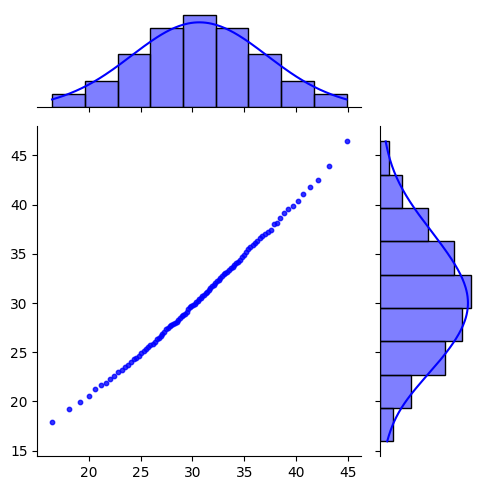

In [ ]:
imt_quantiles = np.percentile(df['bmi'], np.arange(0, 100))

norm_quantiles = sts.norm.ppf(np.arange(0, 100) / 100, loc=np.mean(df['bmi']), scale=np.std(df['bmi']))

g = sns.jointplot(x=norm_quantiles, y=imt_quantiles, kind = "reg", truncate = True,
                 color = "b", height = 5, ratio=3,
                 scatter_kws={'s':10,}, line_kws={'lw': 1, 'color':'black'})

Наблюдается идеальная прямая, данные следуют нормальному закону.

/usr/local/lib/python3.10/dist-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib/python3.10/dist-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


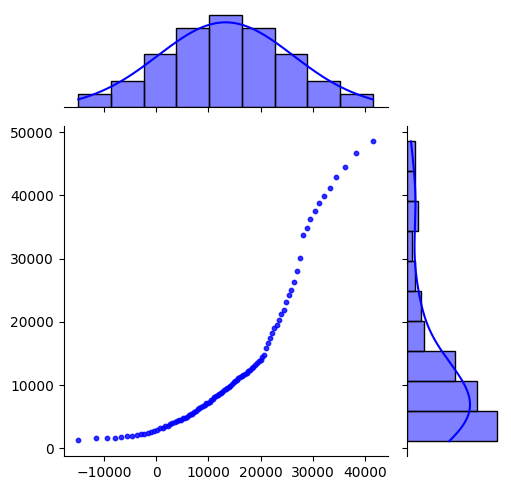

In [ ]:
imt_quantiles = np.percentile(df['charges'], np.arange(0, 100))

norm_quantiles = sts.norm.ppf(np.arange(0, 100) / 100, loc=np.mean(df['charges']), scale=np.std(df['charges']))

g = sns.jointplot(x=norm_quantiles, y=imt_quantiles, kind = "reg", truncate = True,
                 color = "b", height = 5, ratio=3,
                 scatter_kws={'s':10,}, line_kws={'lw': 10, 'color':'black'})

Распределение исследуемой выборки сильно
отличается от нормального

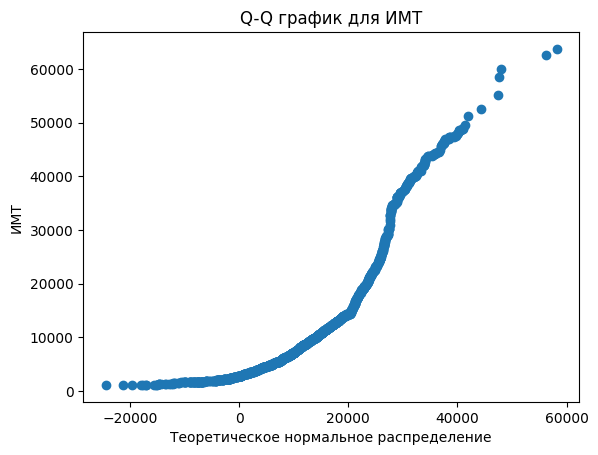

In [ ]:
'''mean_imt = df['charges'].mean()
std_imt = df['charges'].std()
norm_dist = np.random.normal(mean_imt, std_imt, len(df['charges']))

# Сортируем данные и нормальное распределение
data_imt_sorted = np.sort(df['charges'])
norm_dist_sorted = np.sort(norm_dist)

# Строим Q-Q график
plt.scatter(norm_dist_sorted, data_imt_sorted)
plt.xlabel("Теоретическое нормальное распределение")
plt.ylabel("ИМТ")
plt.title("Q-Q график для ИМТ")
plt.show()'''

In [ ]:
ks_statistic, ks_p_value = stats.kstest(df['bmi'], 'norm', (df['bmi'].mean(), df['bmi'].std()))
print("KS-статистика для bmi:", ks_statistic)
print("p-значение для bmi:", ks_p_value)

ks_statistic, ks_p_value = stats.kstest(df['charges'], 'norm', (df['charges'].mean(), df['charges'].std()))
print("KS-статистика для charges:", ks_statistic)
print("p-значение для charges:", ks_p_value)

KS-статистика для bmi: 0.026099881197044872
p-значение для bmi: 0.3162798242838005
KS-статистика для charges: 0.18846450965981876
p-значение для charges: 4.381949677777384e-42


По полученным данным можно сказать что выборка  имеет нормальное расспределение,
можно принять нормальную гипотезу (p-значение > 0.05)

В случае с charges  мы отклоняем нулевую гипотезу, так как p-значение < 0.05, а график показывает что распределение выборки отличается от нормального

In [ ]:
'''print(stats.shapiro(df['bmi'])) #Для выборок <= 50
print(stats.shapiro(df['charges']))'''

ShapiroResult(statistic=0.9938861727714539, pvalue=2.6033414542325772e-05)
ShapiroResult(statistic=0.8146880865097046, pvalue=1.1505194006561963e-36)


# Загрузить данные из файла “ECDCCases.csv”.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AI_Datasets/BigData_3/ECDCCases.csv")
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
4,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266


# Проверить в данных наличие пропущенных значений. Вывести количество пропущенных значений в процентах. Удалить два признака, в которых больше всех пропущенных значений. Для оставшихся признаков обработать пропуски: для категориального признака использовать заполнение значением по умолчанию (например, «other»), для числового признака использовать заполнение медианным значением. Показать, что пропусков больше в данных нет.

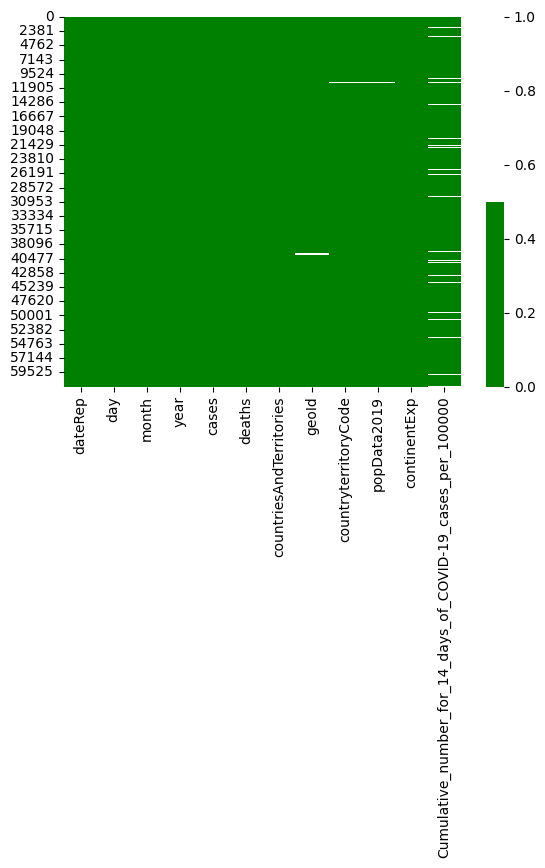

In [ ]:
colors = ['green', 'white']
sns.heatmap(df.isna(), cmap = sns.color_palette(colors))
plt.show()

In [ ]:
for column in df.columns:
  missing = np.mean(df[column].isna()*100)
  print(f" {column} : {round(missing,1)}%")

 dateRep : 0.0%
 day : 0.0%
 month : 0.0%
 year : 0.0%
 cases : 0.0%
 deaths : 0.0%
 countriesAndTerritories : 0.0%
 geoId : 0.4%
 countryterritoryCode : 0.2%
 popData2019 : 0.2%
 continentExp : 0.0%
 Cumulative_number_for_14_days_of_COVID-19_cases_per_100000 : 4.7%


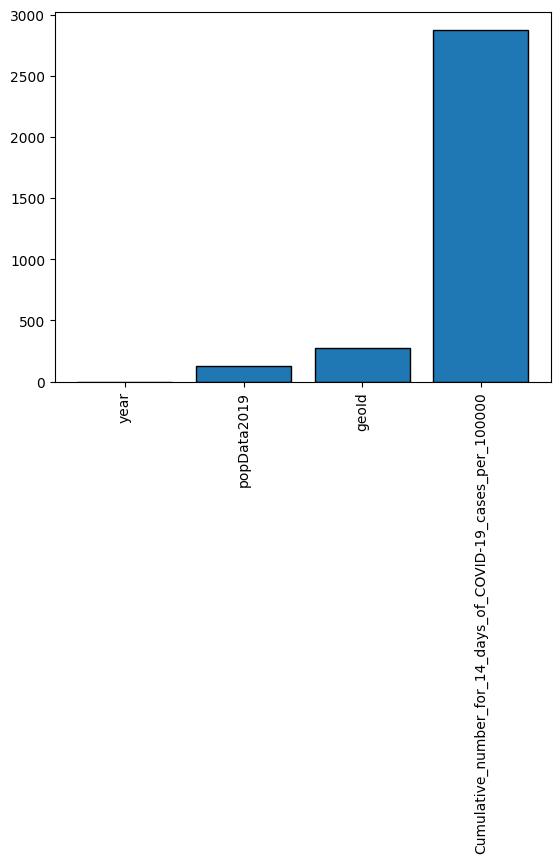

In [ ]:
d = dict()
for column in df.columns:
  missing = df[column].isna().sum()
  without_missing = len(df[column]) - missing
  d[column] = missing
sorted_dict = sorted([(value, key) for (key, value) in d.items()])
sort = dict(sorted_dict)
plt.bar(sort.values(), sort.keys(), edgecolor = 'black')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df.drop('Cumulative_number_for_14_days_of_COVID-19_cases_per_100000', axis = 1, inplace = True)
df.drop('geoId', axis = 1, inplace = True)

In [ ]:
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2019,continentExp
0,14/12/2020,14,12,2020,746,6,Afghanistan,AFG,38041757.0,Asia
1,13/12/2020,13,12,2020,298,9,Afghanistan,AFG,38041757.0,Asia
2,12/12/2020,12,12,2020,113,11,Afghanistan,AFG,38041757.0,Asia
3,12/12/2020,12,12,2020,113,11,Afghanistan,AFG,38041757.0,Asia
4,11/12/2020,11,12,2020,63,10,Afghanistan,AFG,38041757.0,Asia


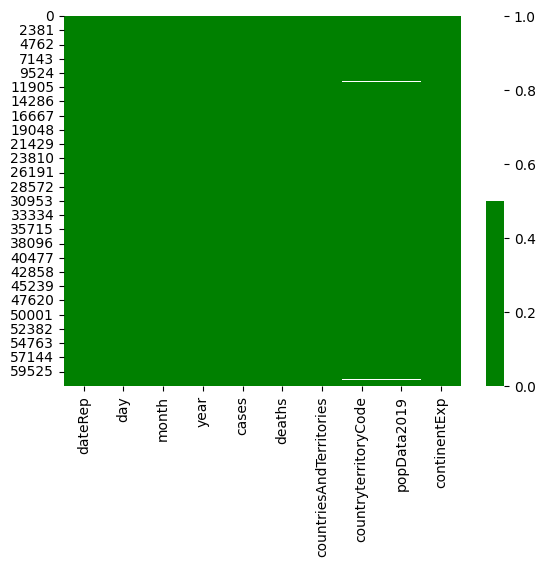

In [ ]:
colors = ['green', 'white']
sns.heatmap(df.isna(), cmap = sns.color_palette(colors))
plt.show()

In [ ]:
for column in df.columns:
  missing = np.mean(df[column].isna()*100)
  print(f" {column} : {round(missing,1)}%")


 dateRep : 0.0%
 day : 0.0%
 month : 0.0%
 year : 0.0%
 cases : 0.0%
 deaths : 0.0%
 countriesAndTerritories : 0.0%
 countryterritoryCode : 0.2%
 popData2019 : 0.2%
 continentExp : 0.0%


In [ ]:
popData = df.popData2019.median()
df.popData2019.fillna(popData, inplace = True)

#countryCode = df.countryterritoryCode.describe().top
df.countryterritoryCode.fillna('other', inplace = True)

In [ ]:
for column in df.columns:
  missing = np.mean(df[column].isna()*100)
  print(f" {column} : {round(missing,1)}%")

 dateRep : 0.0%
 day : 0.0%
 month : 0.0%
 year : 0.0%
 cases : 0.0%
 deaths : 0.0%
 countriesAndTerritories : 0.0%
 countryterritoryCode : 0.0%
 popData2019 : 0.0%
 continentExp : 0.0%


# Посмотреть статистику по данным, используя describe(). Сделать выводы о том, какие признаки содержат выбросы. Посмотреть, для каких стран количество смертей в день превысило 3000 и сколько таких дней было.

In [ ]:
df.describe()

,day,month,year,cases,deaths,popData2019
count,61904.000000,61904.000000,61904.000000,61904.000000,61904.000000,6.190400e+04
mean,15.629232,7.067104,2019.998918,1155.079026,26.053987,4.091909e+07
std,8.841624,2.954816,0.032881,6779.010824,131.222948,1.529798e+08
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.324820e+06
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.851583e+07
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09


In [ ]:
high_death_days = df[df["deaths"] > 3000]
num_high_death_days = high_death_days.shape[0]

high_death_countries = high_death_days["countriesAndTerritories"].unique()
num_high_death_countries = len(high_death_countries)

print(f"Количество дней с более чем 3000 смертями: {num_high_death_days}")
print(f"Количество стран с более чем 3000 смертями: {num_high_death_countries}")

Количество дней с более чем 3000 смертями: 11
Количество стран с более чем 3000 смертями: 5


In [ ]:
new_df = df.loc[df['deaths'] > 3000]
print(new_df[['countriesAndTerritories', 'day']].groupby(by='countriesAndTerritories').count())

                          day
countriesAndTerritories      
Argentina                   1
Ecuador                     1
Mexico                      1
Peru                        2
United_States_of_America    6


<Axes: >

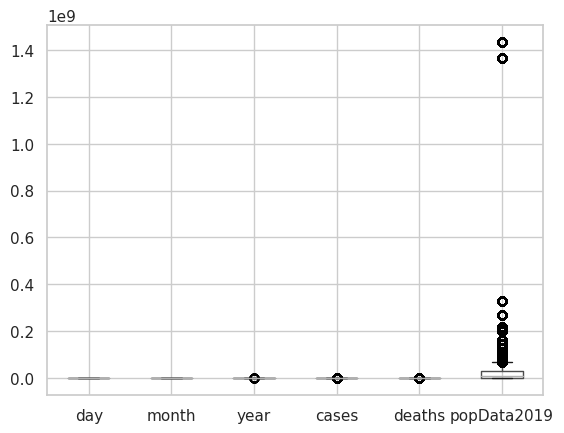

In [ ]:
df.boxplot()

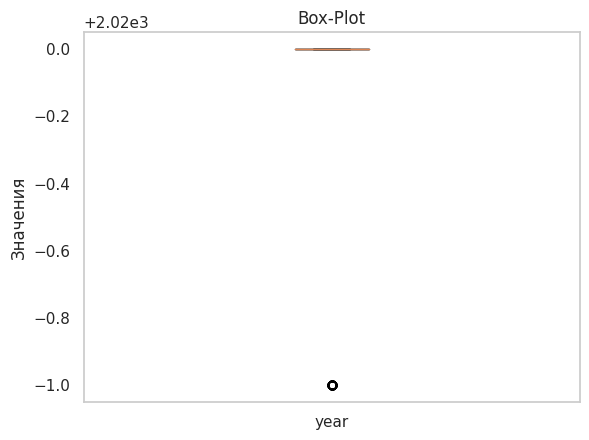

In [ ]:
plt.boxplot([df["year"]])
plt.title('Box-Plot')
plt.ylabel('Значения')
plt.xticks([1], ['year'])
#plt.scatter(df['children'], df['children'], marker='o', label='Точки рассеяния')
plt.grid()
plt.show()

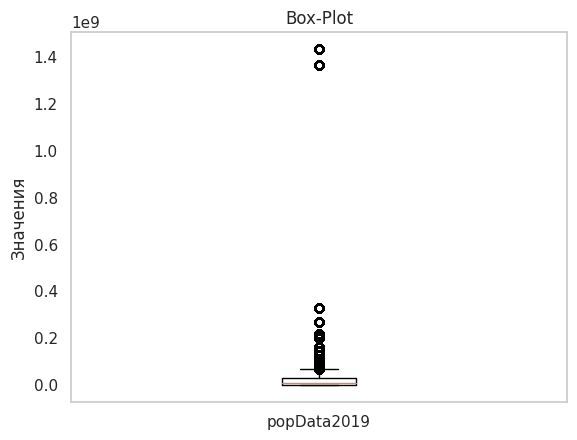

In [ ]:
plt.boxplot([df["popData2019"]])
plt.title('Box-Plot')
plt.ylabel('Значения')
plt.xticks([1], ['popData2019'])
#plt.scatter(df['children'], df['children'], marker='o', label='Точки рассеяния')
plt.grid()
plt.show()

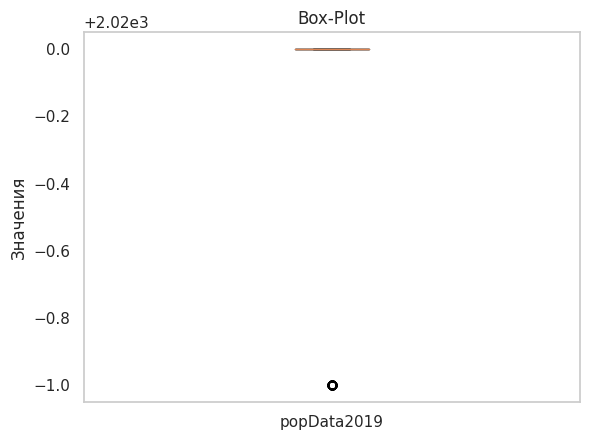

In [ ]:
plt.boxplot([df["year"]])
plt.title('Box-Plot')
plt.ylabel('Значения')
plt.xticks([1], ['popData2019'])
#plt.scatter(df['children'], df['children'], marker='o', label='Точки рассеяния')
plt.grid()
plt.show()

Text(0.5, 1.0, 'Гистограмма для countryterritoryCode')

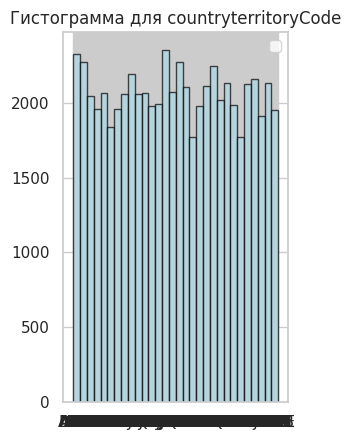

In [ ]:
plt.subplot(1, 2, 1)
plt.hist(df['countryterritoryCode'], edgecolor = "black", bins=30, color='lightBlue', alpha=0.7)
plt.legend()
plt.title('Гистограмма для countryterritoryCode')

Text(0.5, 1.0, 'Гистограмма для dateRep')

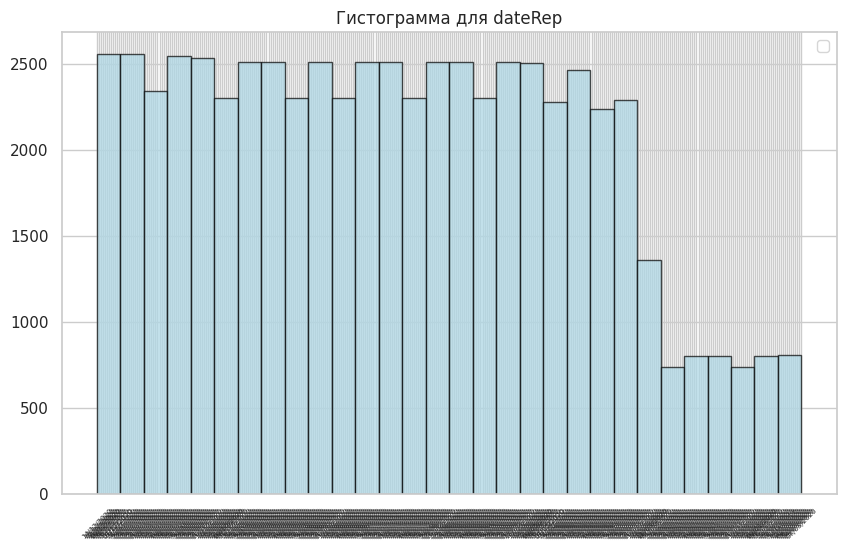

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['dateRep'], edgecolor = "black", bins=30, color='lightBlue', alpha=0.7)
plt.xticks(rotation=45, fontsize=5)
plt.legend()
plt.title('Гистограмма для dateRep')

Text(0.5, 1.0, 'Гистограмма для continentExp')

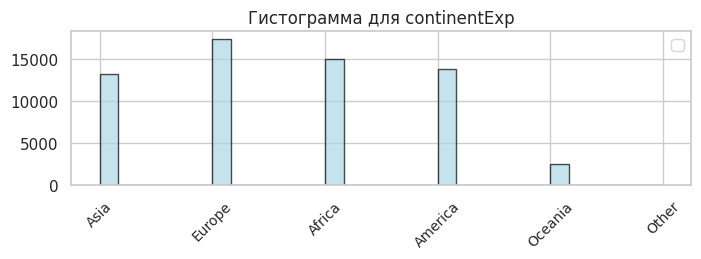

In [ ]:
plt.figure(figsize=(8, 2))
plt.hist(df['continentExp'], edgecolor = "black", bins=30, color='lightBlue', alpha=0.7)
plt.xticks(rotation=45, fontsize=10)
plt.legend()
plt.title('Гистограмма для continentExp')

Text(0.5, 1.0, 'Гистограмма для month')

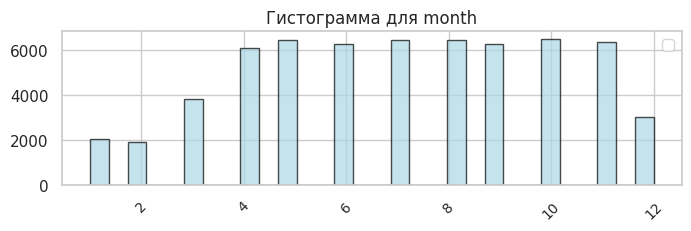

In [ ]:
plt.figure(figsize=(8, 2))
plt.hist(df['month'], edgecolor = "black", bins=30, color='lightBlue', alpha=0.7)
plt.xticks(rotation=45, fontsize=10)
plt.legend()
plt.title('Гистограмма для month')

Text(0.5, 1.0, 'Гистограмма для day')

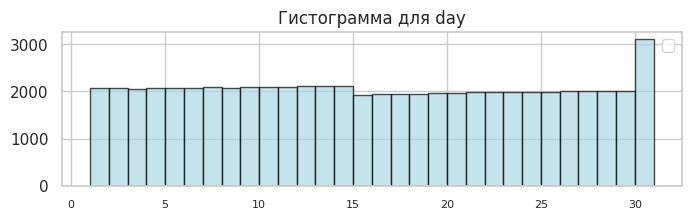

In [ ]:
plt.figure(figsize=(8, 2))
plt.hist(df['day'], edgecolor = "black", bins=30, color='lightBlue', alpha=0.7)
plt.xticks(fontsize=8)
plt.legend()
plt.title('Гистограмма для day')

Найти дублирование данных. Удалить дубликаты.

In [ ]:
df.countriesAndTerritories.value_counts()

Brazil                                        350
South_Korea                                   350
Italy                                         350
Japan                                         350
Iran                                          350
                                             ... 
Cases_on_an_international_conveyance_Japan     64
Solomon_Islands                                60
Wallis_and_Futuna                              59
Marshall_Islands                               47
Vanuatu                                        34
Name: countriesAndTerritories, Length: 214, dtype: int64

In [ ]:
df.countriesAndTerritories.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia',
       'Cuba', 'Curaçao', 'Cyprus', 'Czechia',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Eri

In [ ]:
df.duplicated()

0        False
1        False
2        False
3         True
4        False
         ...  
61899    False
61900    False
61901    False
61902    False
61903    False
Length: 61904, dtype: bool

In [ ]:
new_df = df.drop_duplicates()

In [ ]:
new_df.duplicated()

0        False
1        False
2        False
4        False
5        False
         ...  
61899    False
61900    False
61901    False
61902    False
61903    False
Length: 61900, dtype: bool

# Загрузить данные из файла “bmi.csv”. Взять оттуда две выборки. Одна выборка – это индекс массы тела людей c региона northwest, вторая выборка – это индекс массы тела людей с региона southwest. Сравнить средние значения этих выборок, используя t-критерий Стьюдента Предварительно проверить выборки на нормальность (критерий Шопиро-Уилка) и на гомогенность дисперсии (критерий Бартлетта).

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AI_Datasets/BigData_3/bmi.csv")
df.head()

,bmi,region
0,22.705,northwest
1,28.880,northwest
2,27.740,northwest
3,25.840,northwest
4,28.025,northwest


In [ ]:
df.region.unique()

array(['northwest', 'southwest'], dtype=object)

In [ ]:
northwest_bmi = df[df['region'] == 'northwest']['bmi']
southwest_bmi = df[df['region'] == 'southwest']['bmi']

In [ ]:
shapiro_nw = sts.shapiro(northwest_bmi)
print("Shapiro-Wilk для northwest_bmi:", shapiro_nw)

shapiro_sw = sts.shapiro(southwest_bmi)
print("Shapiro-Wilk для southwest_bmi:", shapiro_sw)

Shapiro-Wilk для northwest_bmi: ShapiroResult(statistic=0.9954646825790405, pvalue=0.4655335247516632)
Shapiro-Wilk для southwest_bmi: ShapiroResult(statistic=0.9949268698692322, pvalue=0.3629520535469055)


Тест дает p-значение выше 0.05, следовательно, выборки имеют
нормальное распределение.

In [ ]:
bartlett_test = sts.bartlett(northwest_bmi, southwest_bmi)
print("Bartlett's test for homogeneity of variances:", bartlett_test)

Bartlett's test for homogeneity of variances: BartlettResult(statistic=3.4000745256459286, pvalue=0.06519347353581818)


p-значение выше 0.05, следовательно дисперсии выборок примерно одинаковы

In [ ]:
t_statistic, p_value = sts.ttest_ind(northwest_bmi, southwest_bmi) # t - Стьюдента
print("t-статистика:", t_statistic)
print("p-значение:", p_value)

t-статистика: -3.2844171500398582
p-значение: 0.001076958496307695


p - значение меньше 0.05, следовательно выборки принадлежат к разным ген. совокупностям и их средние значения различны

# Кубик бросили 600 раз. С помощью критерия Хи-квадрат проверить, является ли полученное распределение равномерным. Использовать функцию scipy.stats.chisquare().

In [ ]:
from scipy.stats import chisquare


observed_frequencies = [97, 98, 109, 95, 97, 104]
expected_frequencies = [600 / 6] * 6

chi2, p = chisquare(observed_frequencies, f_exp=expected_frequencies)

print("Статистика Хи-квадрат:", chi2)
print("p-значение:", p)

alpha = 0.05  # Уровень значимости
if p < alpha:
    print("Распределение НЕ является равномерным.")
else:
    print("Распределение является равномерным.")


Статистика Хи-квадрат: 1.44
p-значение: 0.9198882077437889
Распределение является равномерным.


# С помощью критерия Хи-квадрат проверить, являются ли переменные зависимыми.
Использовать функцию scipy.stats.chi2_contingency().
Влияет ли семейное положение на занятость?

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
data = pd.DataFrame({'Женат': [89, 17, 11, 43, 22, 1],
                     'Гражданский брак': [80, 22, 20, 35, 6, 4],
                     'Не состоит в отношениях': [35, 44, 35, 6, 8, 22]})

data.index = ['Полный рабочий день', 'Частичная занятость',
              'Временно не работает', 'На домохозяйстве', 'На пенсии', 'Учёба']

In [ ]:
chi2, p, dof, expected = chi2_contingency(data)

print("Статистика Хи-квадрат:", chi2)
print("p-значение:", p)
print("Степени свободы:", dof)
print("Ожидаемые частоты:")
print(expected)


Статистика Хи-квадрат: 122.29654948595365
p-значение: 1.7291616900960234e-21
Степени свободы: 10
Ожидаемые частоты:
[[74.664 68.136 61.2  ]
 [30.378 27.722 24.9  ]
 [24.156 22.044 19.8  ]
 [30.744 28.056 25.2  ]
 [13.176 12.024 10.8  ]
 [ 9.882  9.018  8.1  ]]


p - критерий меньше 0.05, семейное положение влияет на занятость